In [1]:
from lenstronomy.Util import util
from lenstronomy.LightModel.light_model import LightModel
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
from lenstronomy.Plots import lens_plot

import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

cmap = plt.get_cmap('gist_heat')
cmap.set_bad(color='k', alpha=1.)
cmap.set_under('k')

# matplotlib configs
from pylab import rc

SystemError: initialization of _internal failed without raising an exception

<ipython-input-72-c1a0a58d1ff7>:120: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


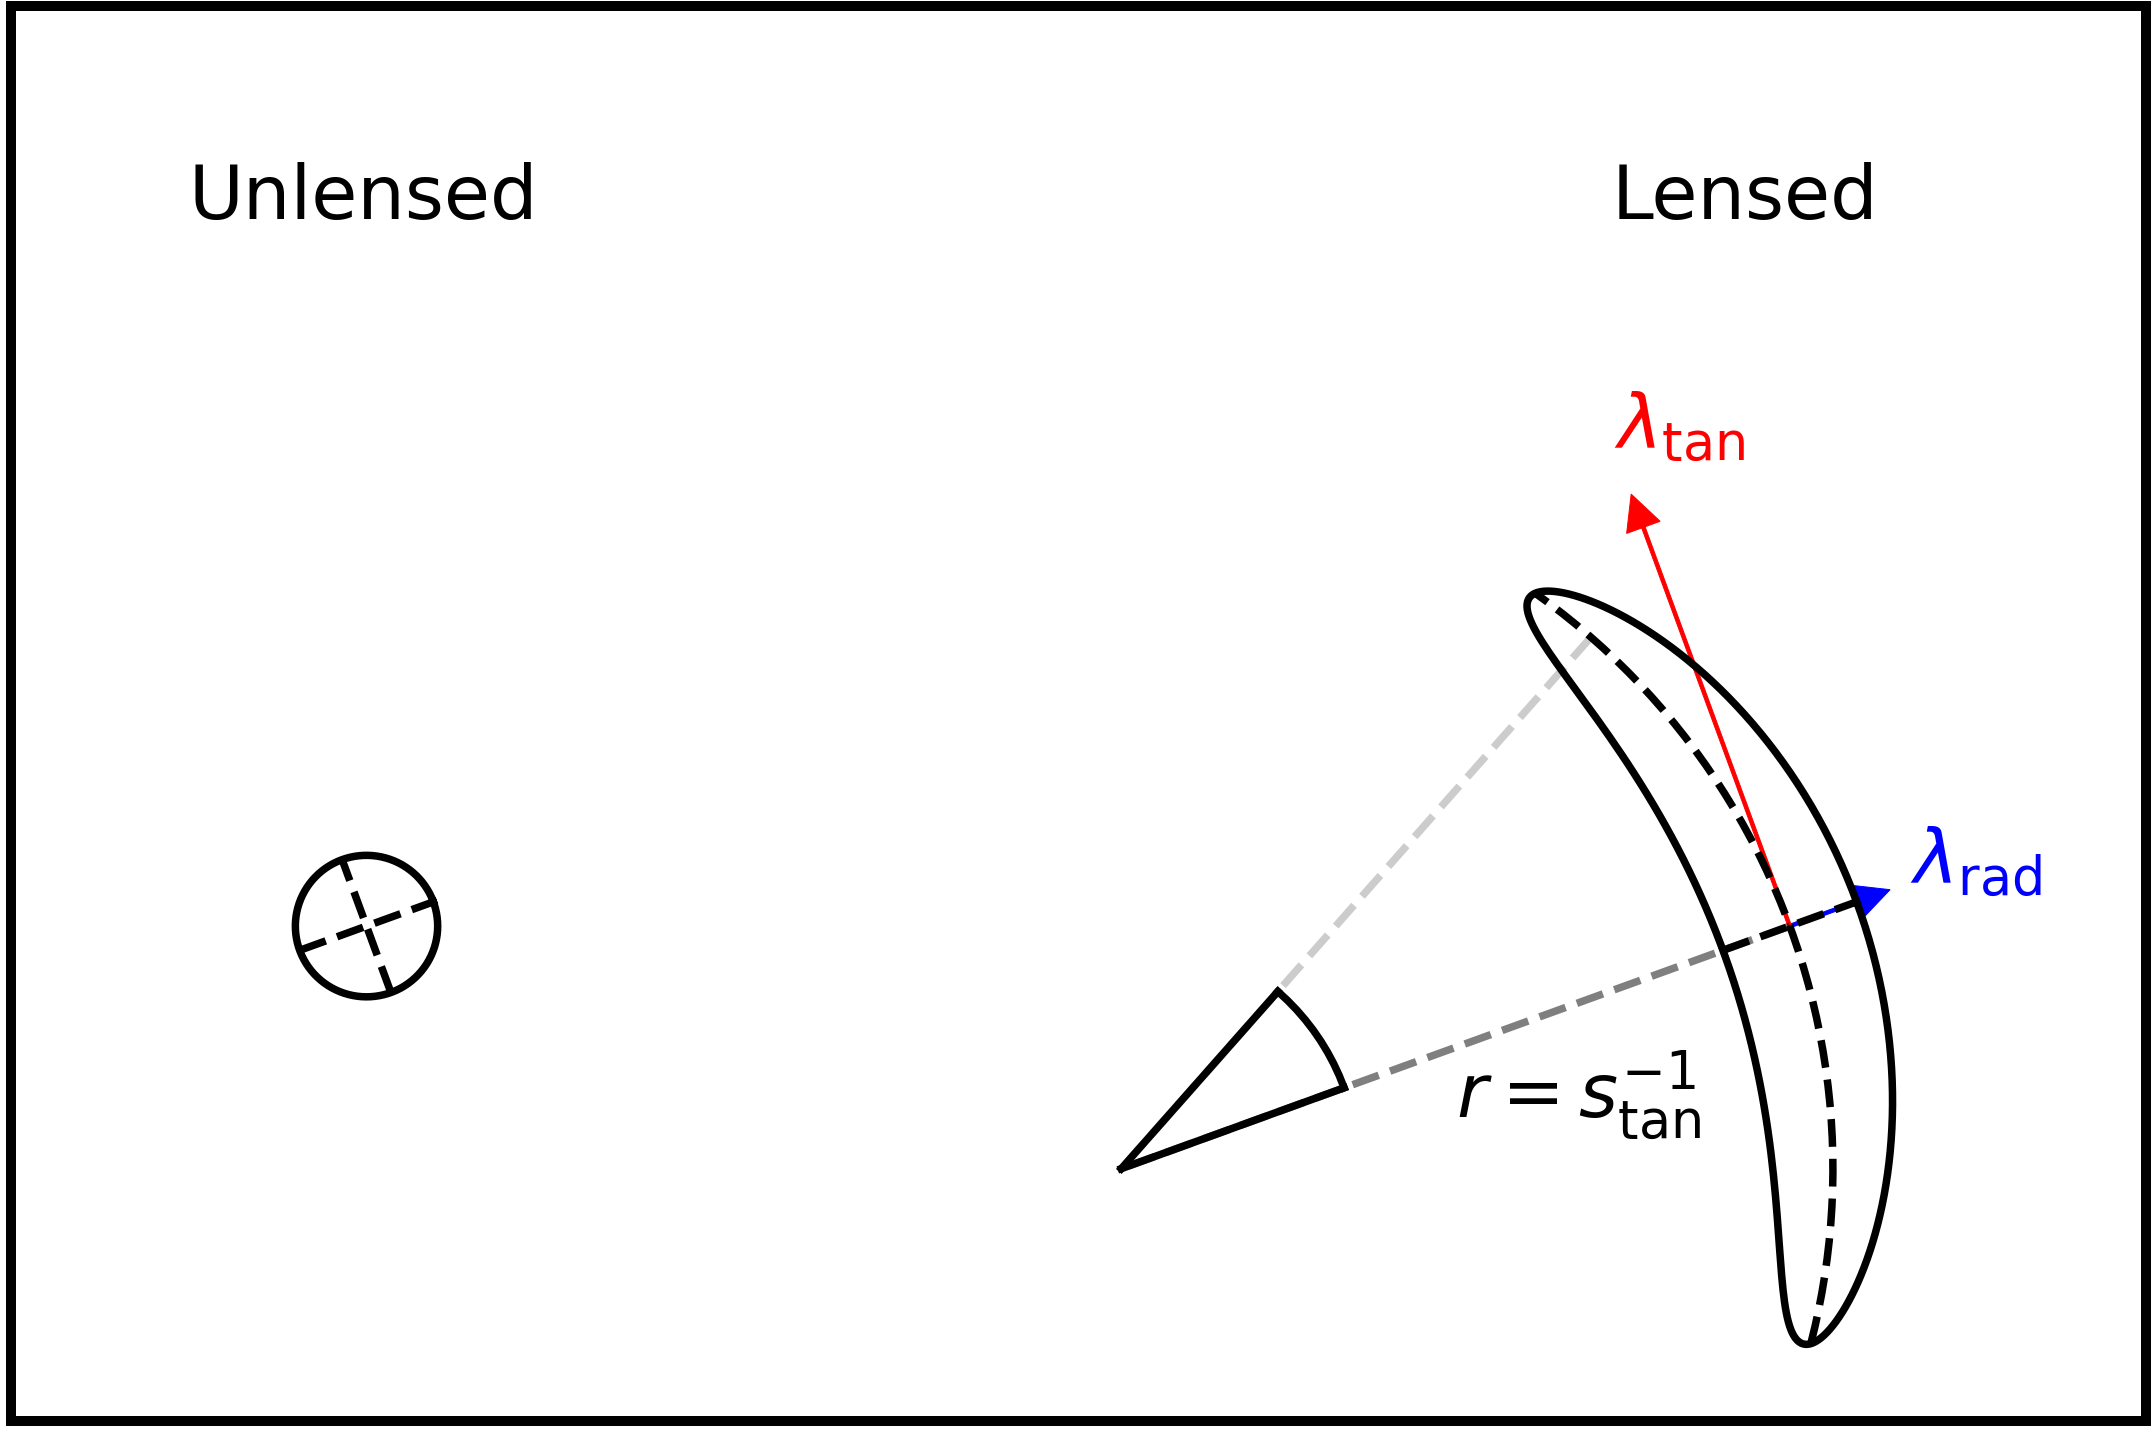

In [72]:
# curved arc with eigenvectors
from lenstronomy.LensModel.Profiles.curved_arc_spp import center_deflector

direction = 0.35
radial_stretch = 1.
tangential_stretch = 6.
curvature = 0.1
center_x, center_y = 10., -3.


color1, color2 = 'steelblue', 'crimson'
color1, color2 = 'b', 'r'

kwargs_lens_ij = {'tangential_stretch': tangential_stretch, 'radial_stretch': radial_stretch, 
                  'curvature': curvature, 'direction': direction, 'center_x': center_x, 'center_y': center_y}


scl = 5.

stretch_scale = 1.

rc('axes', linewidth=2*scl)
rc('xtick',labelsize=20*scl)
rc('ytick',labelsize=20)



linewidth = 1.5*scl

f, ax = plt.subplots(1, 1, figsize=(6*scl, 4*scl))
lens_plot.plot_arc(ax, stretch_scale=stretch_scale, with_centroid=True,linewidth=linewidth, **kwargs_lens_ij)


# plotting arrows at the location (0,0)

dx_r = np.cos(direction) * radial_stretch * stretch_scale
dy_r = np.sin(direction) * radial_stretch * stretch_scale

ax.arrow(center_x, center_y, dx_r, dy_r, alpha=1, width=0.01*scl,
                  head_width=0.5, head_length=0.5, color=color1)

dx_t = -np.sin(direction) * tangential_stretch * stretch_scale
dy_t = np.cos(direction) * tangential_stretch * stretch_scale

ax.arrow(center_x, center_y, dx_t, dy_t, alpha=1, width=0.01*scl,
                  head_width=0.5, head_length=0.5, color=color2)

ax.text(center_x + 1.8*dx_r, center_y + 1.8*dy_r, r"$\lambda_{\rm rad}$", fontsize=15*scl, color=color1)
ax.text(center_x + 1.2*dx_t, center_y + 1.2*dy_t, r"$\lambda_{\rm tan}$", fontsize=15*scl, color=color2)


# off-setting location in tangential direction

direction_ = direction + curvature * 5

curv_center_x, curv_center_y = center_deflector(curvature, direction, center_x, center_y)

center_x_ = np.cos(direction_) / curvature + curv_center_x
center_y_ = np.sin(direction_) / curvature + curv_center_y


dx_r = np.cos(direction_) * radial_stretch * stretch_scale
dy_r = np.sin(direction_) * radial_stretch * stretch_scale

#ax.arrow(center_x_, center_y_, dx_r, dy_r, linestyle='-', alpha=0.5, width=0.01*scl,
#                  head_width=0.5, head_length=0.5, color=color1)

dx_t = -np.sin(direction_) * tangential_stretch * stretch_scale
dy_t = np.cos(direction_) * tangential_stretch * stretch_scale

#ax.arrow(center_x_, center_y_, dx_t, dy_t, linestyle='-', alpha=0.5, width=0.01*scl,
#                  head_width=0.5, head_length=0.5, color=color2)

ax.plot([center_x_, curv_center_x], [center_y_, curv_center_y], 'k--', alpha=0.2, linewidth=linewidth)

# plot curvature angle
r = 1./curvature / 3 # we plot the angle at half the curvature radius

phi = np.linspace(start=direction, stop=direction_, num=10)
x_ = np.cos(phi) * r + curv_center_x
y_ = np.sin(phi) * r + curv_center_y


x_s = np.cos(phi[0]) * r*1.5 + curv_center_x
y_s = np.sin(phi[0]) * r*1.5 + curv_center_y - 1.

ax.plot(x_, y_, 'k-', linewidth=linewidth)
ax.plot([x_[0], curv_center_x], [y_[0], curv_center_y], 'k-', linewidth=linewidth)
ax.plot([x_[-1], curv_center_x], [y_[-1], curv_center_y], 'k-', linewidth=linewidth)
ax.text(x_s, y_s, r"$r=s^{-1}_{\rm tan}$", fontsize=15*scl, color='k')



center_x0, center_y0 = -10., -3
kwargs_lens_ij0 = {'tangential_stretch': 1., 'radial_stretch': 1., 
                  'curvature': 1e-5, 'direction': direction, 'center_x': center_x0, 'center_y': center_y0}

lens_plot.plot_arc(ax, stretch_scale=stretch_scale, with_centroid=False,linewidth=linewidth, **kwargs_lens_ij0)




ax.set_xlim([-15, 15])
ax.set_ylim([-10, 10])


ax.text(center_x0-0.5*scl, center_y0+10., 'Unlensed', fontsize=15*scl, color='k')
ax.text(center_x-0.5*scl, center_y+10., 'Lensed', fontsize=15*scl, color='k')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.autoscale(False)
# rectangular frame
#ax.axis('scaled')
f.tight_layout()

#plt.savefig('/Users/sibirrer/Science/Publications/ArcPhenomenology/AAS/figures/eigenvector_illustration.pdf', format='pdf', dpi=None, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)   

f.show()